## Description

Short notebook to check how the generation/processing is going. Reads in all hdf5 files of a certain simulation set for all levels and checks the number of events. Then some distributions are plotted and stored. This should help to check everything before production.

In [1]:
import glob
import os
from icecube.LeptonInjector import hdf5_to_feather

from collections import OrderedDict

import numpy as np

import matplotlib.pyplot as plt

style_file = os.path.expandvars('$I3_SRC/LeptonInjector/python/hnl_mpl_plotstyle.mplstyle')
plt.style.use(style_file)

base_plot_dir = '/n/holylfs05/LABS/arguelles_delgado_lab/Lab/HNL_MC/plots/gen_verification'
print(base_plot_dir)

/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/jbook/i3/build/lib/icecube/LeptonInjector/__init__.py:1: UserWarning: Deprication Warning: load_pybindings() is deprecated use `from icecube._your_module import *`
  from icecube.load_pybindings import load_pybindings
/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/jbook/i3/build/lib/icecube/LeptonInjector/cascade_generator_functions.py:4: UserWarning: Using `import I3Tray` or `from I3Tray import *` is now considered depricated. Please switch to using `from icecube.icetray import I3Tray`
  from I3Tray import I3Units


/n/holylfs05/LABS/arguelles_delgado_lab/Lab/HNL_MC/plots/gen_verification


### Read in HDF5 files of each level

In [7]:
# define base path for this set
# sim_base_dir = '/n/holylfs05/LABS/arguelles_delgado_lab/Lab/HNL_MC/190200'  # should work for any set
sim_base_dir = '/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/jbook/test_weighted'  # should work for any set

levels = [
    'Gen',
    'Phot',
    'Det',
    'L1',
    'L2',
#     'L3',
#     'L4',
#     'L5',
#     'L6',
#     'L7',
#     'L8',
]

# dict for infilepaths
infiles = OrderedDict(zip(levels, [list() for level in levels]))

In [8]:
# get the infilepaths
for key, item in infiles.items():
#     print(key)
    
    item.extend(
        glob.glob(os.path.join(sim_base_dir, '{}/*.hdf5'.format(key)))  # for Gen/Phot
    )
    item.extend(
        glob.glob(os.path.join(sim_base_dir, '{}/*/*/*.hdf5'.format(key)))  # for Det/L1/L2/L3/L4/L5
    )
    
#     print(item)
#     break

print(infiles)

OrderedDict([('Gen', ['/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/jbook/test_weighted/Gen/test_weighting_03.hdf5']), ('Phot', ['/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/jbook/test_weighted/Phot/test_weighting_03.hdf5']), ('Det', ['/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/jbook/test_weighted/Det/test_weighting_03.hdf5']), ('L1', ['/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/jbook/test_weighted/L1/test_weighting_03.hdf5']), ('L2', ['/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/jbook/test_weighted/L2/test_weighting_03.hdf5'])])


In [9]:
# define keys to extract (at L3 the HDF5 writer also extracts other objects)

keys_to_extract = [
    # EventProperties
    "decay_channel",
    "distance",
    "distanceMax",
    "distanceMin",
    "finalStateX",
    "finalStateY",
    "final_state_particle0",
    "final_state_particle1",
    "primary_type",
    "lifetime",
    "mHNL",
    "outgoing_neutrino_energy",
    "totalEnergy",
    "physical",
    "total_column_depth",
    # I3MCTree
    # true HNL variables
    "HNL_true_x",
    "HNL_true_y",
    "HNL_true_z",
    "HNL_true_energy",
    "HNL_true_zenith",
    "HNL_true_azimuth",
    "HNL_true_time",
    # true primary variables
    "true_x",
    "true_y",
    "true_z",
    "true_energy",
    "true_zenith",
    "true_azimuth",
    "true_time",
    # true first (DIS) cascade variables
    "casc0_true_x",
    "casc0_true_y",
    "casc0_true_z",
    "casc0_true_energy",
    "casc0_true_zenith",
    "casc0_true_azimuth",
    "casc0_true_time",
    # true second (HNL decay) cascade variables
    "casc1_true_x",
    "casc1_true_y",
    "casc1_true_z",
    "casc1_true_energy",
    "casc1_true_zenith",
    "casc1_true_azimuth",
    "casc1_true_time",
    "nan_decay_energy",
#     # weights
#     "LeptonInjectorWeight",
#     "LifetimeWeight_1e-03",
#     "OneWeight",    
#     "ReferenceWeight_1e-03",
]

In [10]:
# read in the hdffiles and store the dataframes (only need to run this once, and then you can access the feather file directly)
level_data = OrderedDict()

for key, item in infiles.items():
    print(key)
    
    level_data[key] = hdf5_to_feather(item, '/n/holylfs05/LABS/arguelles_delgado_lab/Lab/HNL_MC/feather/'+key, keys=keys_to_extract)    
    
#     break

INFO:root:Keys to be extracted: dict_keys(['decay_channel', 'distance', 'distanceMax', 'distanceMin', 'finalStateX', 'finalStateY', 'final_state_particle0', 'final_state_particle1', 'primary_type', 'lifetime', 'mHNL', 'outgoing_neutrino_energy', 'totalEnergy', 'physical', 'total_column_depth', 'HNL_true_x', 'HNL_true_y', 'HNL_true_z', 'HNL_true_energy', 'HNL_true_zenith', 'HNL_true_azimuth', 'HNL_true_time', 'true_x', 'true_y', 'true_z', 'true_energy', 'true_zenith', 'true_azimuth', 'true_time', 'casc0_true_x', 'casc0_true_y', 'casc0_true_z', 'casc0_true_energy', 'casc0_true_zenith', 'casc0_true_azimuth', 'casc0_true_time', 'casc1_true_x', 'casc1_true_y', 'casc1_true_z', 'casc1_true_energy', 'casc1_true_zenith', 'casc1_true_azimuth', 'casc1_true_time', 'nan_decay_energy'])


Gen


100%|██████████| 1/1 [00:01<00:00,  1.86s/it]
INFO:root:Keys to be extracted: dict_keys(['decay_channel', 'distance', 'distanceMax', 'distanceMin', 'finalStateX', 'finalStateY', 'final_state_particle0', 'final_state_particle1', 'primary_type', 'lifetime', 'mHNL', 'outgoing_neutrino_energy', 'totalEnergy', 'physical', 'total_column_depth', 'HNL_true_x', 'HNL_true_y', 'HNL_true_z', 'HNL_true_energy', 'HNL_true_zenith', 'HNL_true_azimuth', 'HNL_true_time', 'true_x', 'true_y', 'true_z', 'true_energy', 'true_zenith', 'true_azimuth', 'true_time', 'casc0_true_x', 'casc0_true_y', 'casc0_true_z', 'casc0_true_energy', 'casc0_true_zenith', 'casc0_true_azimuth', 'casc0_true_time', 'casc1_true_x', 'casc1_true_y', 'casc1_true_z', 'casc1_true_energy', 'casc1_true_zenith', 'casc1_true_azimuth', 'casc1_true_time', 'nan_decay_energy'])


Phot


100%|██████████| 1/1 [00:00<00:00,  1.01it/s]
INFO:root:Keys to be extracted: dict_keys(['decay_channel', 'distance', 'distanceMax', 'distanceMin', 'finalStateX', 'finalStateY', 'final_state_particle0', 'final_state_particle1', 'primary_type', 'lifetime', 'mHNL', 'outgoing_neutrino_energy', 'totalEnergy', 'physical', 'total_column_depth', 'HNL_true_x', 'HNL_true_y', 'HNL_true_z', 'HNL_true_energy', 'HNL_true_zenith', 'HNL_true_azimuth', 'HNL_true_time', 'true_x', 'true_y', 'true_z', 'true_energy', 'true_zenith', 'true_azimuth', 'true_time', 'casc0_true_x', 'casc0_true_y', 'casc0_true_z', 'casc0_true_energy', 'casc0_true_zenith', 'casc0_true_azimuth', 'casc0_true_time', 'casc1_true_x', 'casc1_true_y', 'casc1_true_z', 'casc1_true_energy', 'casc1_true_zenith', 'casc1_true_azimuth', 'casc1_true_time', 'nan_decay_energy'])


Det


100%|██████████| 1/1 [00:00<00:00,  4.66it/s]
INFO:root:Keys to be extracted: dict_keys(['decay_channel', 'distance', 'distanceMax', 'distanceMin', 'finalStateX', 'finalStateY', 'final_state_particle0', 'final_state_particle1', 'primary_type', 'lifetime', 'mHNL', 'outgoing_neutrino_energy', 'totalEnergy', 'physical', 'total_column_depth', 'HNL_true_x', 'HNL_true_y', 'HNL_true_z', 'HNL_true_energy', 'HNL_true_zenith', 'HNL_true_azimuth', 'HNL_true_time', 'true_x', 'true_y', 'true_z', 'true_energy', 'true_zenith', 'true_azimuth', 'true_time', 'casc0_true_x', 'casc0_true_y', 'casc0_true_z', 'casc0_true_energy', 'casc0_true_zenith', 'casc0_true_azimuth', 'casc0_true_time', 'casc1_true_x', 'casc1_true_y', 'casc1_true_z', 'casc1_true_energy', 'casc1_true_zenith', 'casc1_true_azimuth', 'casc1_true_time', 'nan_decay_energy'])


L1


100%|██████████| 1/1 [00:00<00:00,  3.94it/s]
INFO:root:Keys to be extracted: dict_keys(['decay_channel', 'distance', 'distanceMax', 'distanceMin', 'finalStateX', 'finalStateY', 'final_state_particle0', 'final_state_particle1', 'primary_type', 'lifetime', 'mHNL', 'outgoing_neutrino_energy', 'totalEnergy', 'physical', 'total_column_depth', 'HNL_true_x', 'HNL_true_y', 'HNL_true_z', 'HNL_true_energy', 'HNL_true_zenith', 'HNL_true_azimuth', 'HNL_true_time', 'true_x', 'true_y', 'true_z', 'true_energy', 'true_zenith', 'true_azimuth', 'true_time', 'casc0_true_x', 'casc0_true_y', 'casc0_true_z', 'casc0_true_energy', 'casc0_true_zenith', 'casc0_true_azimuth', 'casc0_true_time', 'casc1_true_x', 'casc1_true_y', 'casc1_true_z', 'casc1_true_energy', 'casc1_true_zenith', 'casc1_true_azimuth', 'casc1_true_time', 'nan_decay_energy'])


L2


100%|██████████| 1/1 [00:00<00:00,  4.23it/s]


In [7]:
det_keys =  [
     "MCPESeriesMap",
     "MCPESeriesMap_withNoise",
#      "triggers_fired",
#      "trigger_sources",
#      "trigger_types",
]
# Load det level events
filepath = '/n/holylfs05/LABS/arguelles_delgado_lab/Lab/HNL_MC/190200/Det/'
infile_name = 'test_00.hdf5'
outfile_name = 'test4.feather'
# Take hdf5 to feather, and then turn it in to a dataframe
df_det = hdf5_to_feather([filepath+infile_name], '/n/holylfs05/LABS/arguelles_delgado_lab/Lab/HNL_MC/feather/'+outfile_name, keys=det_keys
                )

INFO:root:Keys to be extracted: dict_keys(['MCPESeriesMap', 'MCPESeriesMap_withNoise'])
100%|██████████| 1/1 [00:00<00:00, 131.06it/s]

Something went wrong and it happened with the file: /n/holylfs05/LABS/arguelles_delgado_lab/Lab/HNL_MC/190200/Det/test_00.hdf5


In [ ]:
phot_keys = [
    "casc0_photons",
    "casc0_photons_at_doms",
    "casc0_photon_weights",
    "casc1_photons",
    "casc1_photons_at_doms",
    "casc1_photon_weights",
]

# Load phot level events
filepath = '/n/holylfs05/LABS/arguelles_delgado_lab/Lab/HNL_MC/190200/Phot/'
infile_name = 'test_00.hdf5'
outfile_name = 'test_phot.feather'
# Take hdf5 to feather, and then turn it in to a dataframe
df_phot = hdf5_to_feather([filepath+infile_name], 
                          '/n/holylfs05/LABS/arguelles_delgado_lab/Lab/HNL_MC/feather/'+outfile_name, 
                          keys=phot_keys)
                

In [8]:
df_phot

,MCPESeriesMap,MCPESeriesMap_withNoise,n_files


In [51]:
import h5py    
import numpy as np    
f1 = h5py.File(filepath+infile_name,'r+')

In [54]:
print(list(f1['__I3Index__']))
list(f1['__I3Index__']['triggers_fired'])

['MCPESeriesMap', 'MCPESeriesMap_withNoise', 'triggers_fired']


[(1, 34, 0, 0, 1, 0, 1),
 (1, 57, 0, 0, 1, 1, 2),
 (1, 78, 0, 0, 1, 2, 3),
 (1, 80, 0, 0, 1, 3, 4),
 (1, 133, 0, 0, 1, 4, 5),
 (1, 139, 0, 0, 1, 5, 6),
 (1, 152, 0, 0, 1, 6, 7),
 (1, 200, 0, 0, 1, 7, 8),
 (1, 312, 0, 0, 1, 8, 9),
 (1, 344, 0, 0, 1, 9, 10),
 (1, 366, 0, 0, 1, 10, 11),
 (1, 397, 0, 0, 1, 11, 12),
 (1, 441, 0, 0, 1, 12, 13),
 (1, 457, 0, 0, 1, 13, 14),
 (1, 459, 0, 0, 1, 14, 15),
 (1, 466, 0, 0, 1, 15, 16),
 (1, 467, 0, 0, 1, 16, 17),
 (1, 500, 0, 0, 1, 17, 18),
 (1, 512, 0, 0, 1, 18, 19),
 (1, 525, 0, 0, 1, 19, 20),
 (1, 537, 0, 0, 1, 20, 21),
 (1, 541, 0, 0, 1, 21, 22),
 (1, 568, 0, 0, 1, 22, 23),
 (1, 586, 0, 0, 1, 23, 24),
 (1, 587, 0, 0, 1, 24, 25),
 (1, 617, 0, 0, 1, 25, 26),
 (1, 622, 0, 0, 1, 26, 27),
 (1, 659, 0, 0, 1, 27, 28),
 (1, 688, 0, 0, 1, 28, 29),
 (1, 700, 0, 0, 1, 29, 30),
 (1, 701, 0, 0, 1, 30, 31),
 (1, 702, 0, 0, 1, 31, 32),
 (1, 708, 0, 0, 1, 32, 33),
 (1, 709, 0, 0, 1, 33, 34),
 (1, 746, 0, 0, 1, 34, 35),
 (1, 749, 0, 0, 1, 35, 36),
 (1, 754, 0, 0,

In [55]:
list(f1['__I3Index__']['MCPESeriesMap'])

[(1, 34, 0, 0, 1, 0, 55),
 (1, 57, 0, 0, 1, 55, 72),
 (1, 78, 0, 0, 1, 72, 85),
 (1, 80, 0, 0, 1, 85, 88),
 (1, 133, 0, 0, 1, 88, 144),
 (1, 139, 0, 0, 1, 144, 154),
 (1, 152, 0, 0, 1, 154, 280),
 (1, 200, 0, 0, 1, 280, 287),
 (1, 312, 0, 0, 1, 287, 292),
 (1, 344, 0, 0, 1, 292, 318),
 (1, 366, 0, 0, 1, 318, 328),
 (1, 397, 0, 0, 1, 328, 340),
 (1, 441, 0, 0, 1, 340, 581),
 (1, 457, 0, 0, 1, 581, 616),
 (1, 459, 0, 0, 1, 616, 646),
 (1, 466, 0, 0, 1, 646, 718),
 (1, 467, 0, 0, 1, 718, 743),
 (1, 500, 0, 0, 1, 743, 778),
 (1, 512, 0, 0, 1, 778, 815),
 (1, 525, 0, 0, 1, 815, 834),
 (1, 537, 0, 0, 1, 834, 873),
 (1, 541, 0, 0, 1, 873, 886),
 (1, 568, 0, 0, 1, 886, 892),
 (1, 586, 0, 0, 1, 892, 898),
 (1, 587, 0, 0, 1, 898, 1404),
 (1, 617, 0, 0, 1, 1404, 1424),
 (1, 622, 0, 0, 1, 1424, 1433),
 (1, 659, 0, 0, 1, 1433, 1452),
 (1, 688, 0, 0, 1, 1452, 1487),
 (1, 700, 0, 0, 1, 1487, 1537),
 (1, 701, 0, 0, 1, 1537, 1552),
 (1, 702, 0, 0, 1, 1552, 1607),
 (1, 708, 0, 0, 1, 1607, 1618),
 (1, 70

In [11]:
# Events per level
print('Events per level:')
for key, item in level_data.items():
    print('{:5}: {:6}'.format(key, len(item)))

Events per level:
Gen  : 100000
Phot :  56914
Det  :   2213
L1   :   1845
L2   :   1845


In [8]:
# read from output/log/error files (L1, L2 process script does not count itself..)
times = [
    7104.56,
    1211.7,
    275.85,
    212.,
    114,
    15.779672,
    8.986194,
    117.920323,
    93.852783,
    78.998049,
    00.119944,
]
# Time per level

for key, time in zip(level_data.keys(), times):
    print('{:5}: {:7.2f}s'.format(key, time))

Gen  : 7104.56s
Phot : 1211.70s
Det  :  275.85s
L1   :  212.00s
L2   :  114.00s
L3   :   15.78s
L4   :    8.99s
L5   :  117.92s
L6   :   93.85s
L7   :   79.00s
L8   :    0.12s


## Plot some distributions

In [7]:
only_plot = [
    # EventProperties
    "decay_channel",
    "distance",
#     "distanceMax",
#     "distanceMin",
    "finalStateX",
    "finalStateY",
#     "final_state_particle0",
#     "final_state_particle1",
#     "primary_type",
    "lifetime",
#     "mHNL",
#     "outgoing_neutrino_energy",
    "totalEnergy",
#     "physical",
#     "total_column_depth",
    # I3MCTree
    # true HNL variables
    "HNL_true_x",
    "HNL_true_y",
    "HNL_true_z",
    "HNL_true_energy",
    "HNL_true_zenith",
    "HNL_true_azimuth",
#     "HNL_true_time",
    # true primary variables
    "true_x",
    "true_y",
    "true_z",
    "true_energy",
    "true_zenith",
    "true_azimuth",
#     "true_time",
#     # true first (DIS) cascade variables
#     "casc0_true_x",
#     "casc0_true_y",
#     "casc0_true_z",
#     "casc0_true_energy",
#     "casc0_true_zenith",
#     "casc0_true_azimuth",
#     "casc0_true_time",
#     # true second (HNL decay) cascade variables
#     "casc1_true_x",
#     "casc1_true_y",
#     "casc1_true_z",
#     "casc1_true_energy",
#     "casc1_true_zenith",
#     "casc1_true_azimuth",
#     "casc1_true_time",
#     "nan_decay_energy",
#     # weights
#     "LeptonInjectorWeight",
#     "LifetimeWeight_1e-03",
#     "OneWeight",
#     "ReferenceWeight_1e-03",
]

In [8]:
# set plot bins
plot_bins = dict()

plot_bins["decay_channel"] = np.linspace(0, 8, 9)
plot_bins["distance"] = np.linspace(0, 1e05, 50)

plot_bins["finalStateX"] = np.linspace(0, 1, 50)
plot_bins["finalStateY"] = np.linspace(0, 1, 50)

plot_bins["lifetime"] = np.linspace(0, 16, 50)
plot_bins["totalEnergy"] = np.linspace(0, 1e04, 50)
plot_bins["physical"] = np.linspace(0, 2, 3)

plot_bins["HNL_true_x"] = np.linspace(-600, 600, 50)
plot_bins["HNL_true_y"] = np.linspace(-600, 600, 50)
plot_bins["HNL_true_z"] = np.linspace(-600, 0, 50)

plot_bins["HNL_true_energy"] = np.linspace(0, 6e03, 50)
plot_bins["HNL_true_zenith"] = np.linspace(0, np.pi, 50)
plot_bins["HNL_true_azimuth"] = np.linspace(0, 2*np.pi, 50)

plot_bins["true_x"] = np.linspace(-600, 600, 50)
plot_bins["true_y"] = np.linspace(-600, 600, 50)
plot_bins["true_z"] = np.linspace(-600, 0, 50)

plot_bins["true_energy"] = np.linspace(0, 1e04, 50)
plot_bins["true_zenith"] = np.linspace(0, np.pi, 50)
plot_bins["true_azimuth"] = np.linspace(0, 2*np.pi, 50)

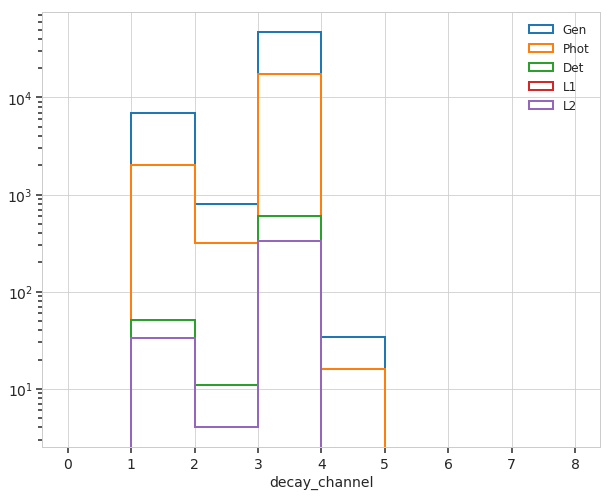

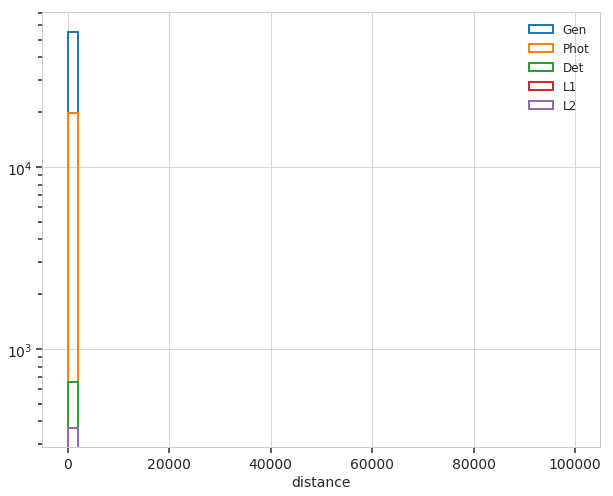

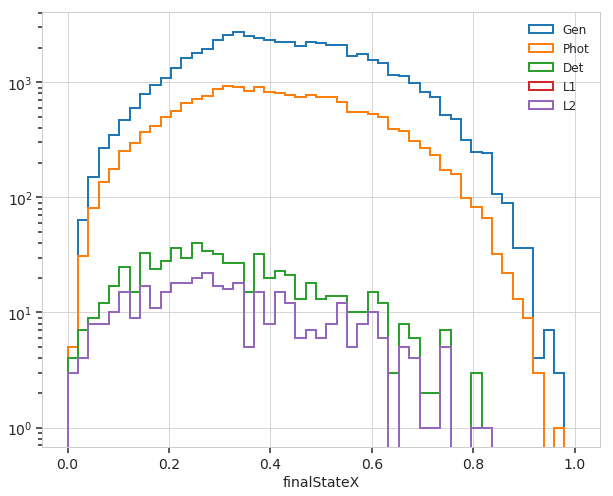

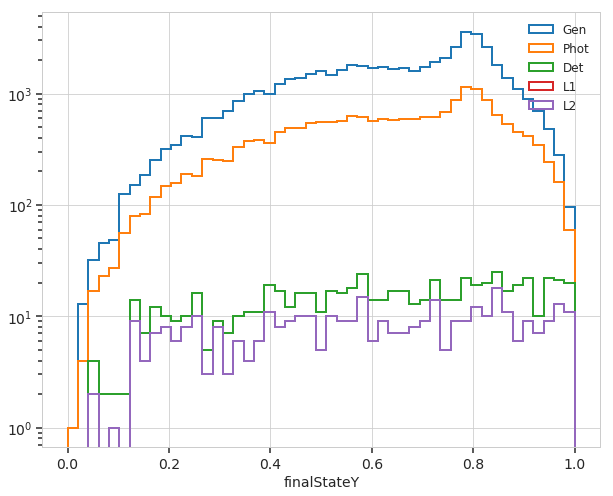

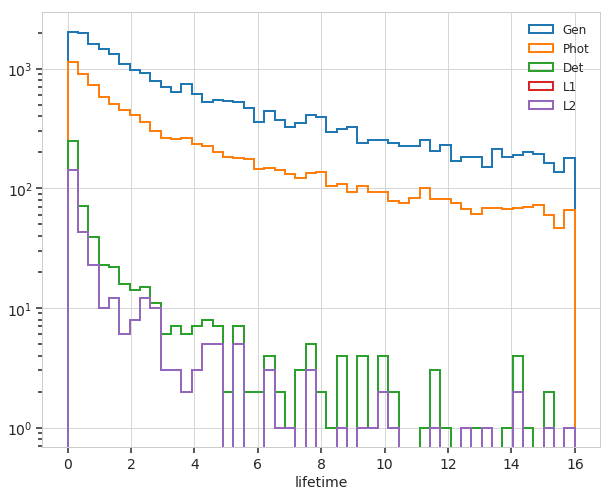

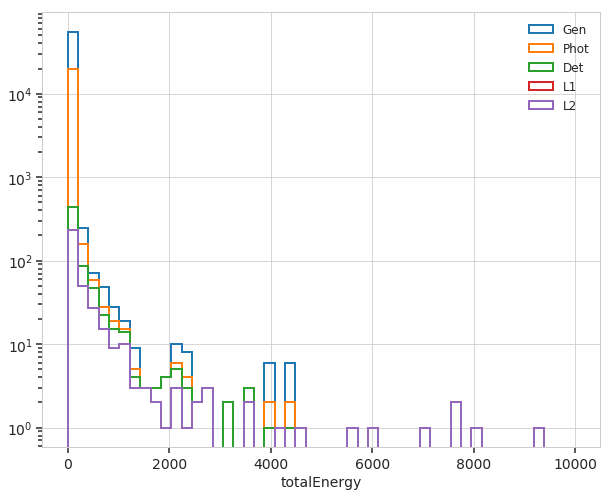

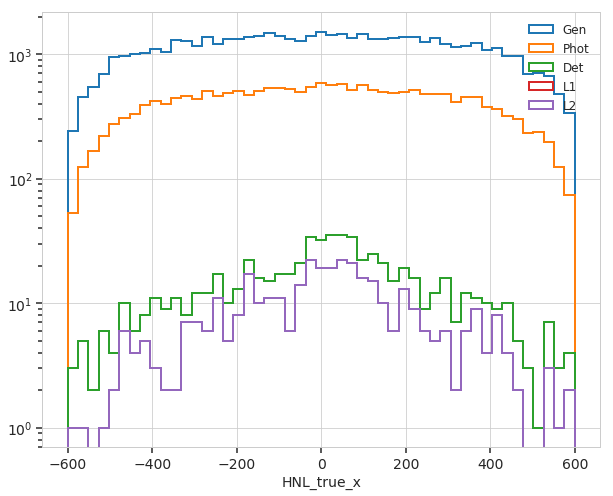

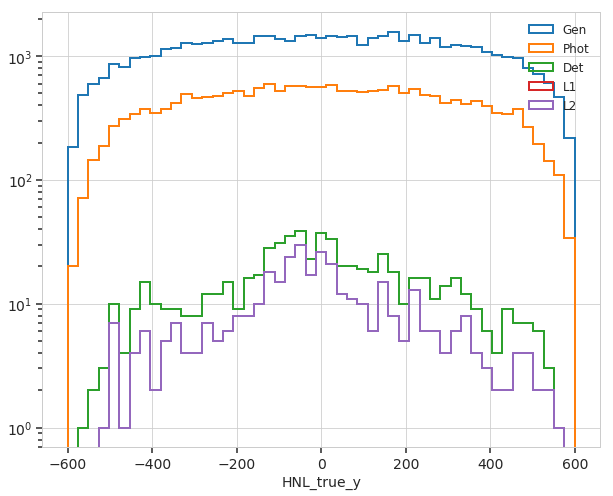

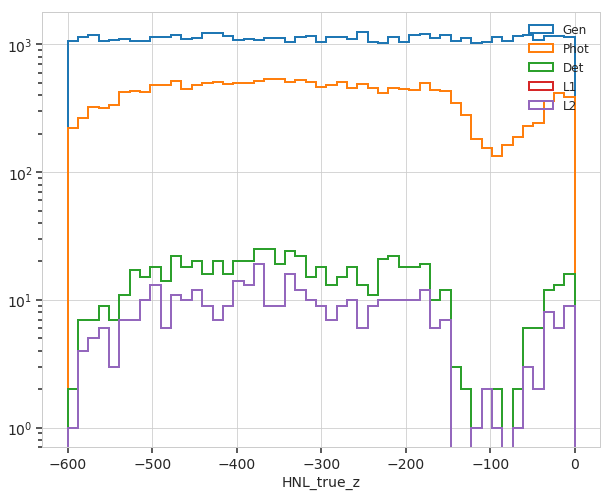

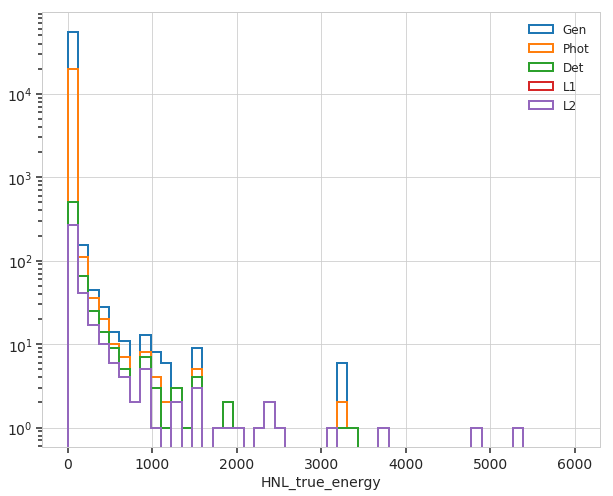

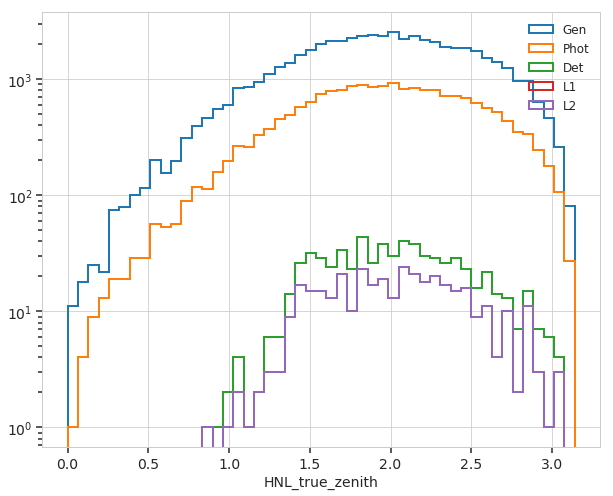

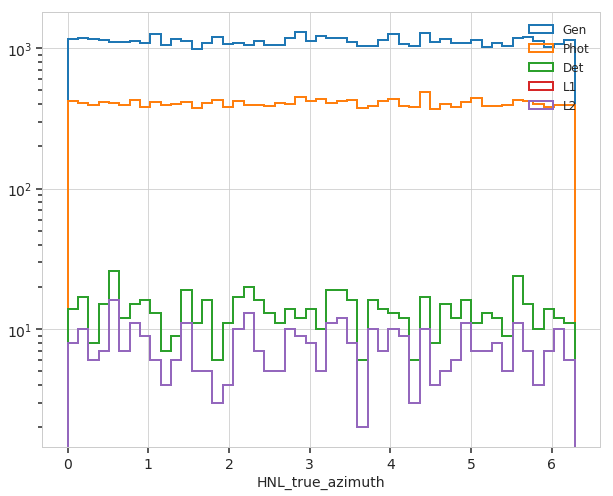

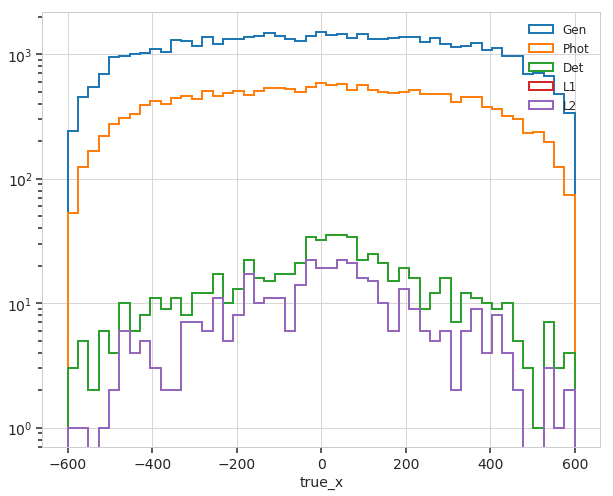

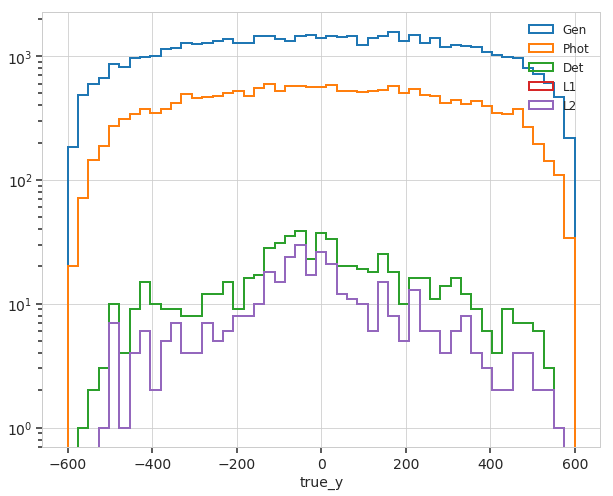

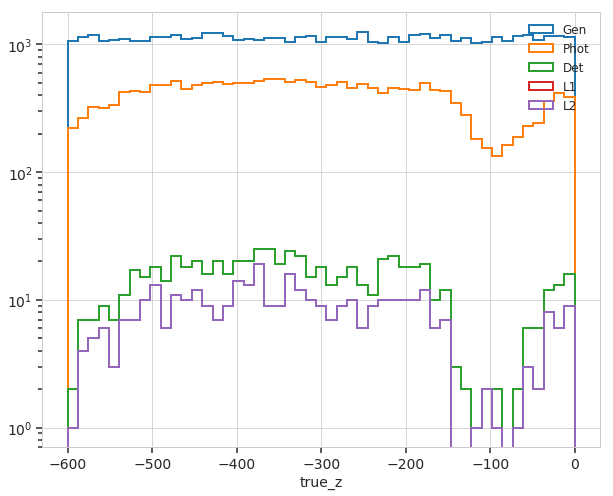

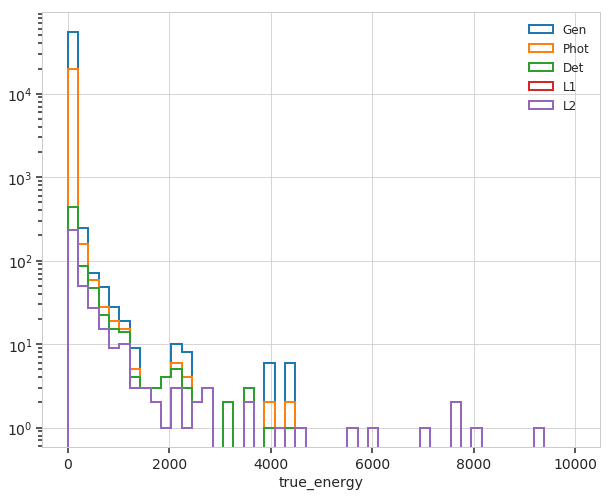

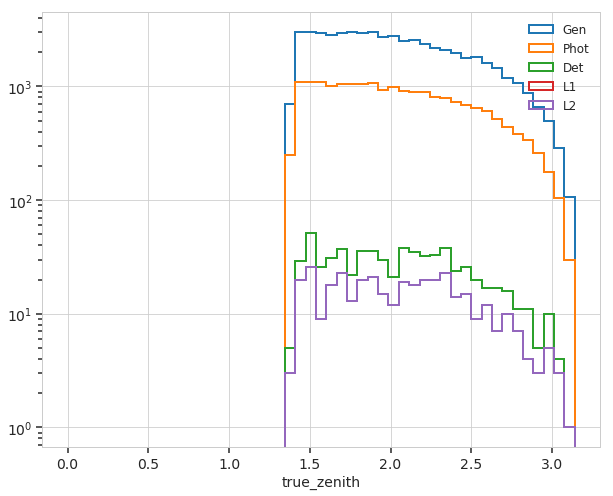

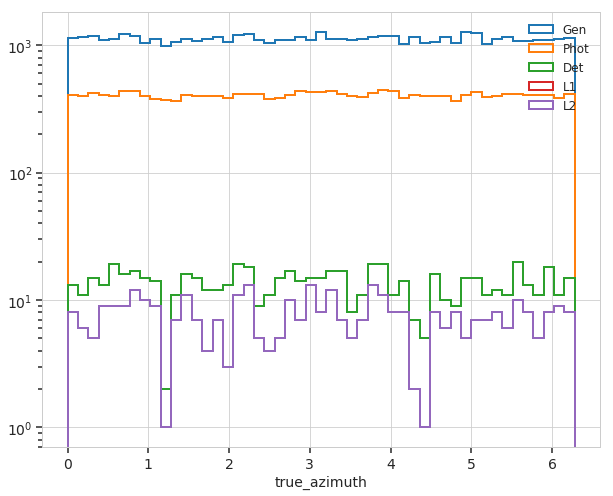

In [9]:
for key in keys_to_extract:
    
    if not key in only_plot:continue    
#     print(key)
    
    fig, ax = plt.subplots(figsize=(10,8))
    
    for level, item in level_data.items():
               
        data = item[key]

        not_nan = ~np.isnan(data)
        if sum(~not_nan):
            print('Number of events with Nan value: {}'.format(sum(~not_nan)))

        if key in plot_bins:
            n,b,p = ax.hist(
                data[not_nan],
                bins=plot_bins[key],
                lw=2.,
                histtype='step',
                label=level,
                )
        else:
            n,b,p = ax.hist(
                data[not_nan],
                bins=50,
                lw=2.,
                histtype='step',
                label=level,
                )
            
        first_set = False
     #   break

        
    ax.set_xlabel(key)
    ax.set_yscale('log')
    
    ax.legend()
    
    plot_name = '{}_190200_Gen_check_processing.png'.format(key)
    
    plot_path = os.path.join(base_plot_dir, plot_name)
    
#    print(plot_path)
#     fig.savefig(plot_path, dpi=300)
    
#     break